In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from plotting_functions import modify_plot, save_figure

styles = ['science']
prefix = 'stylelib/'
sufix = '.mplstyle'

for i in range(len(styles)):
    styles[i] = prefix + styles[i] + sufix

plt.style.use(styles)

In [4]:
%%time
# Path the to file that we want to load
folder = 'data/'
file = 'FAQUAD_DQD_2HH_Tunnelling_reduced'
extension = '.npy'
file_dic = folder + file + extension

data = np.load(file_dic, allow_pickle=True)  # Load the data, allow_pickle enable to load a list
print(data[-1])

['final_density_matrix', 'tf_vec', 'tau_vec', 'parameters']
Wall time: 78 ms


In [5]:
final_density_matrix = data[0]
tf_vec = data[1]
tau_vec = data[2]

n_tf = len(tf_vec)
n_tau = len(tau_vec)

In [6]:
probabilities=np.zeros([3,n_tf*n_tau])

for i in range (0,n_tf*n_tau):
    temp=final_density_matrix[i]
    probabilities[:,i]=np.abs(np.diag(temp))

fidelity=probabilities[1,:].reshape([n_tau,n_tf])

<IPython.core.display.Javascript object>


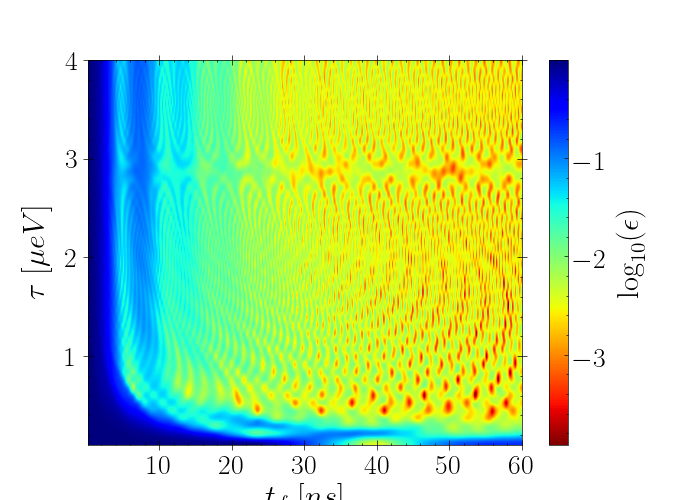

Figure saved


In [9]:
save=True

ticks=20
labels=22
text=22

fig, ax = plt.subplots(figsize=[7, 5])


pos = ax.imshow(np.log10(1-fidelity), origin='lower', cmap='jet_r', aspect='auto',
                 extent=[tf_vec[0], tf_vec[-1], tau_vec[0], tau_vec[-1]], interpolation='spline36')

cbar = fig.colorbar(pos, ax=ax)
cbar.set_label(r'$\log_{10}(\epsilon)$', fontsize=labels, labelpad=10)
cbar.ax.tick_params(labelsize=ticks) 

ax.set_xlabel(r'$t_f\; [ns]$')
ax.set_ylabel(r'$\tau \; [\mu eV]$', labelpad=10)


if save:
    
   
    modify_plot(ax, tick_direction='inout', x_ticks_vector=np.arange(0,61,10),
                label_size=labels, tick_label_size=ticks)

    # plt.tight_layout()
    
    save_figure(fig,'FAQUAD_DQD_Tunnelling', overwrite=save,extension='eps')